# Introduction to neural network classification with Tensorflow

Types:
* Binary
* Multiclass
* Multilabel

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np
from keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import confusion_matrix

In [ ]:
# Make 1000 examples
n_samples = 1000

In [ ]:
# create circles
X,y = make_circles(n_samples, noise=0.03,random_state=711)

In [ ]:
X.shape

(1000, 2)

In [ ]:
X

array([[-0.62399975,  0.43360391],
       [-0.48944975, -0.59921378],
       [ 0.79642371,  0.64157766],
       ...,
       [ 0.03707801,  0.7909038 ],
       [ 0.1562913 ,  0.7932428 ],
       [ 0.42002116, -0.90573583]])

In [ ]:
circles = pd.DataFrame({'X0': X[:,0],'X1': X[:,1],'label':y})

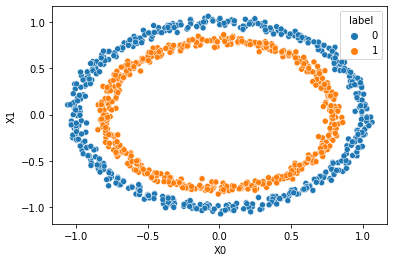

In [ ]:
sns.scatterplot(x='X0',y='X1',hue='label',data=circles)
plt.show()

## Input and Output shapes of our NN

In [ ]:
# Check shapes of features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of featues and labels
X[0], y[0]

(array([-0.62399975,  0.43360391]), 1)

In [ ]:
X[0].shape

(2,)

In [ ]:
y[0].shape

()

## Create train and test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.2)

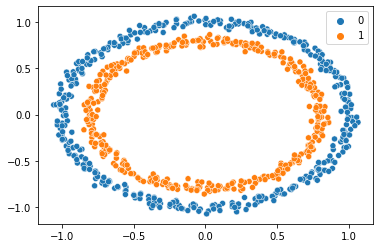

In [ ]:
sns.scatterplot(x=X_train[:,0],y=X_train[:,1],hue=y_train)
plt.show()

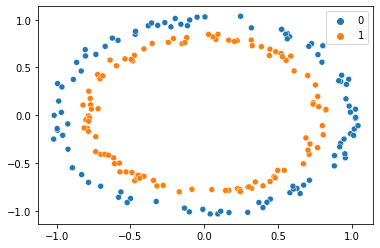

In [ ]:
sns.scatterplot(x=X_test[:,0],y=X_test[:,1],hue=y_test)
plt.show()

## Steps in modelling

In [ ]:
# Set the seed for reproducibility
tf.random.set_seed(711)

In [ ]:
# 1. Build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4,input_shape=(2,),activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
# 2. Compile
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# 3. Fit the model
history = model.fit(X_train,y_train,epochs=25, verbose=1)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.7082 - accuracy: 0.5050
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.7040 - accuracy: 0.4950
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.7011 - accuracy: 0.4625
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6988 - accuracy: 0.4837
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.4762
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.4825
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4812
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4800
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.4762
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.4888
Epoch 11/25
25/25 [

In [ ]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4650


[0.6967743635177612, 0.4650000035762787]

## Plot the predictions by showing the dicision boundary

In [ ]:
def plot_decision_boundary(model, X, y):
  """Plots the decision boundary of a model with features X and labels y"""
  # Define the axis boundaries fo the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))
  
  # Create X values by correct reshaping
  x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D arrays together

  # get predictions
  y_pred = model.predict(x_in)

  if len(y_pred[0])>1:
    print('doing multiclass classification')
    # get the highest predicted label
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


doing binary classification


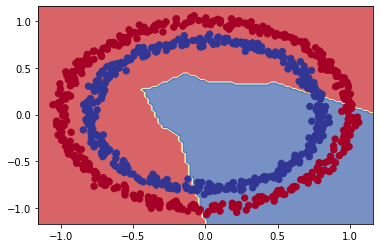

In [ ]:
plot_decision_boundary(model,X_train,y_train)

### Inspect the sigmoid & relu activation function

In [ ]:
A = tf.constant(np.arange(-10,10),dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

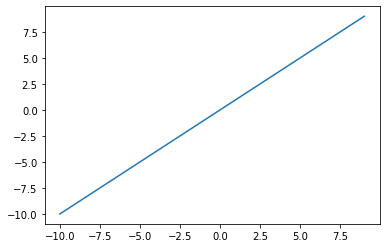

In [ ]:
plt.plot(A,A)

In [61]:
sigmoid = lambda x: 1/(1 + tf.exp(-x))
#plt.plot(A,sigmoid(A))

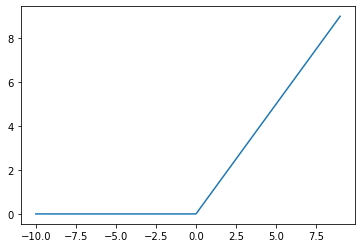

In [ ]:
relu = lambda x: tf.maximum(0,x)
plt.plot(A,relu(A))

## Evaluation and Improvement of the Model

In [ ]:
# 1. Build a new better model
model = tf.keras.Sequential(name='NN_Improved_Classification')
model.add(tf.keras.layers.Dense(4,activation='relu',input_shape=(X_train[0].shape[0],),name='input_layer'))
model.add(tf.keras.layers.Dense(4,activation='relu',name='hidden_layer'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer'))

# 2. Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

### Learning rate callback

In [ ]:
learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [ ]:
# Setting the correct learning rate reduces training time a lot
history = model.fit(X_train, y_train, epochs=100,verbose=1,callbacks=[learning_rate_callback])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.5150
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7027 - accuracy: 0.5138
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7022 - accuracy: 0.5125
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.5125
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7013 - accuracy: 0.5125
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7008 - accuracy: 0.5138
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.5138
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.5138
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.5125
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.5125
Epoch 11/

In [ ]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.8993 - accuracy: 0.5200


[0.8992794156074524, 0.5199999809265137]

### Visualize loss vs learning rate

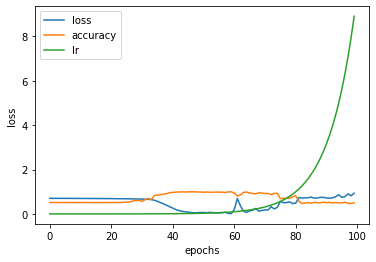

In [ ]:
# plot History
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
model.summary()

Model: "NN_Improved_Classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 4)                 12        
_________________________________________________________________
hidden_layer (Dense)         (None, 4)                 20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


#### Finding the ideal learning rate

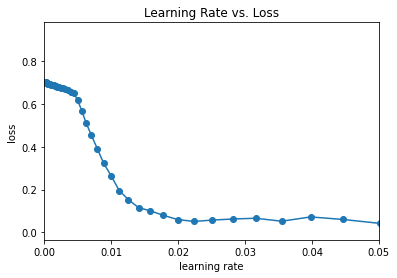

In [ ]:
lr = lambda x: 1e-4 * (10**(x/20))
plt.plot(lr(np.arange(0,100)),pd.DataFrame(history.history).loss)
plt.scatter(lr(np.arange(0,100)),pd.DataFrame(history.history).loss)
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('Learning Rate vs. Loss')
plt.xlim([0,0.05])
plt.show()

## Train a model with ideal learning rate

In [ ]:
# 1. Build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4,activation='relu',input_shape=(2,)))
model.add(tf.keras.layers.Dense(4,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

# 2. Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
early_stopping = EarlyStopping(monitor='accuracy',patience=5)

In [ ]:
history = model.fit(X_train,y_train,epochs=100, callbacks=[early_stopping])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.4750
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5050
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5013
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.5013
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6822 - accuracy: 0.5350
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6757 - accuracy: 0.5387
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6632 - accuracy: 0.5638
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.6950
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5449 - accuracy: 0.7437
Epoch 11/

### Visualize the results

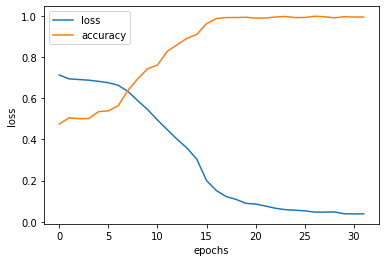

In [ ]:
# plot History
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

doing binary classification
doing binary classification


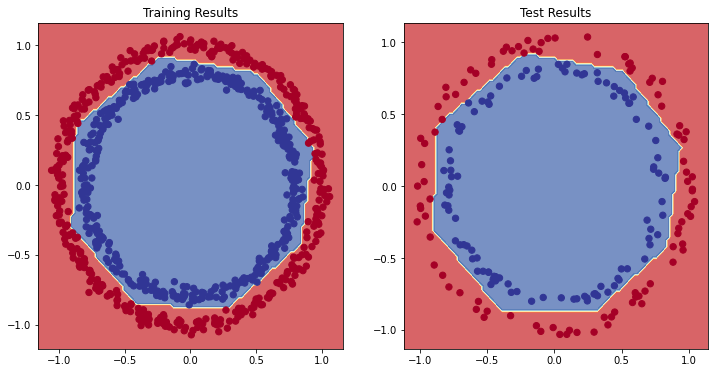

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Training Results')
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test Results')
plot_decision_boundary(model,X_test,y_test)

## Create the Confusion Matrix

In [ ]:
# since the last layer of our NN has a sigmoid activation function 
# we get probability outputs which have to be rounded first to integers
# to be comparable in the confusion matrix
y_pred = model.predict(X_test)

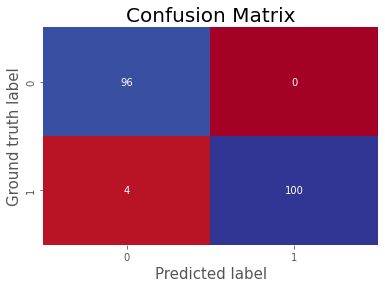

In [ ]:
threshold = 0.5
plt.style.use('ggplot')
sns.heatmap(confusion_matrix(y_test,y_pred>threshold),annot=True,cbar=False,cmap=plt.cm.RdYlBu,fmt='g')
plt.title('Confusion Matrix',fontsize=20)
plt.xlabel('Predicted label',fontsize=15)
plt.ylabel('Ground truth label',fontsize=15)
plt.show()

# Putting it all together with a larger dataset

In [194]:
# IMPORTS
import tensorflow as tf
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import confusion_matrix
import seaborn as sns

ModuleNotFoundError: ignored

In [96]:
# load the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [97]:
dict_labels = {
    0: 'T-Shirt/Top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneeker',
    8: 'Bag',
    9: 'Ankle boot'
}

## Inspect the data first

In [98]:
def plot_images(X,y,num=5):
  # ermittle ob die bilder von vorne (head) oder hinten (tail) gezeigt werden sollen
  sign = np.sign(num)
  num = abs(num)
  # ermittle die anzahl an zeilen die gebraucht werden
  rows = abs(num) // 5 + 1
  for i in range(rows):
    plt.figure(figsize=(12,12))
    # ermittle die anzahl an bildern in der aktuellen zeile
    pics_in_row = 5 if (i+1)*5 < num else num-i*5
    # iteriere über alle bilder in der aktuellen zeile und plotte sie mit ensprechendem label
    for j in range(pics_in_row):
      plt.subplot(1,5,j+1)
      # ermittle entsprechenden index 
      # vorne beginnend mit 0, hinten mit -1
      elem = (i*5+j) if sign > 0 else sign*(i*5+(j+1))
      plt.imshow(X[elem])
      plt.title(dict_labels[y[elem]])
    plt.show()

In [99]:
# Check input shape of a single image
X_train[0].shape

(28, 28)

In [100]:
# Check output shape of the labels
y_train[0].shape

()

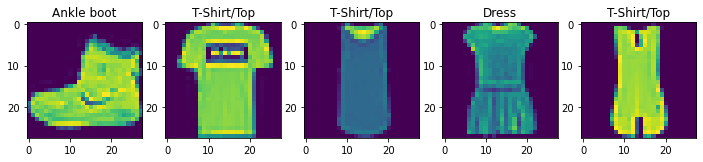

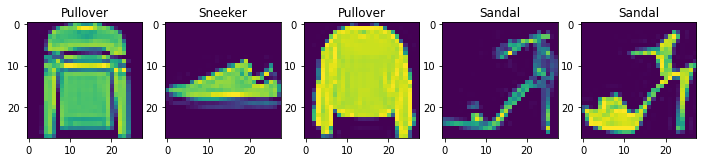

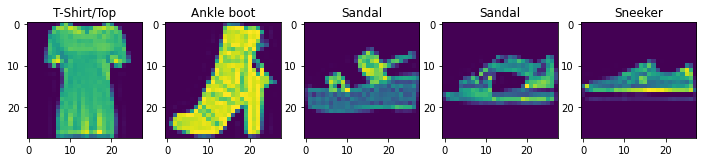

<Figure size 864x864 with 0 Axes>

In [101]:
# Check the training data and corresponding labels
plot_images(X_train,y_train,num=15)

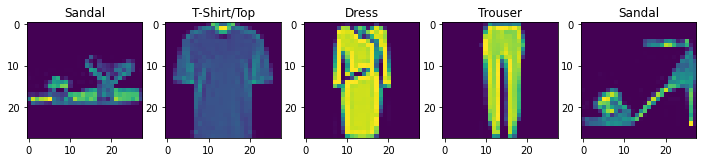

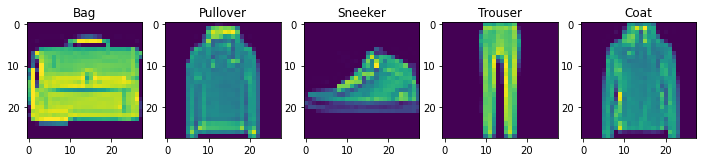

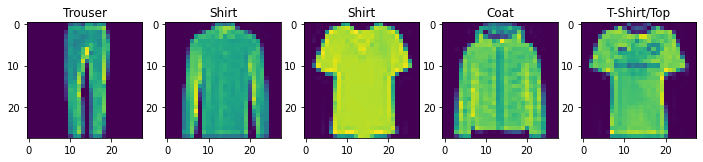

<Figure size 864x864 with 0 Axes>

In [102]:
plot_images(X_train,y_train,num=-15)

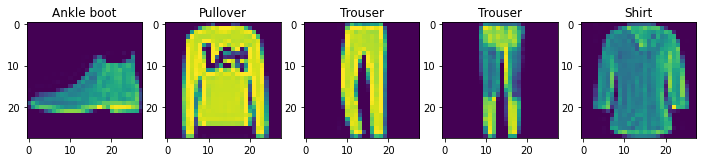

<Figure size 864x864 with 0 Axes>

In [103]:
# Plot the test data with labels
plot_images(X_test,y_test,5)

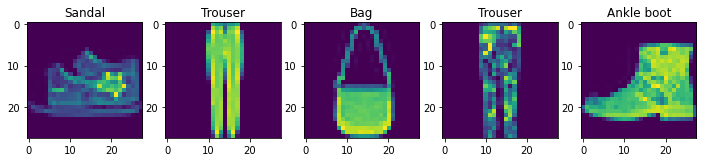

<Figure size 864x864 with 0 Axes>

In [104]:
plot_images(X_test,y_test,-5)

### One hot encode the labels to use be able to use multiclass prediction

In [105]:
# one hot encoding of the labels
y_train = tf.one_hot(y_train,depth=10)
y_test = tf.one_hot(y_test,depth=10)

## Build the model

In [106]:
tf.random.set_seed(711)

In [107]:
# 1. Build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(28,28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(10))

# 2. Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [108]:
# 3. Fit the model
history = model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3515 - accuracy: 0.7610
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0970 - accuracy: 0.8268
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0867 - accuracy: 0.8375
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0813 - accuracy: 0.8436
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0768 - accuracy: 0.8493


In [109]:
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [110]:
y_pred = model.predict(X_test)

In [125]:
np.sum(sigmoid(y_pred[0]))

1.1444843

In [112]:
bce(y_test,y_pred).numpy()

0.10062211

In [113]:
np.round(model.predict(X_test)[0],2)

array([-17.35, -18.95, -32.98, -20.73, -21.79,  -5.86, -22.9 ,  -0.29,
        -9.87,   0.92], dtype=float32)

In [114]:
# 4. Evaluate the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1006 - accuracy: 0.8216


[0.10062213242053986, 0.8216000199317932]

### Plot the training histroy of the model


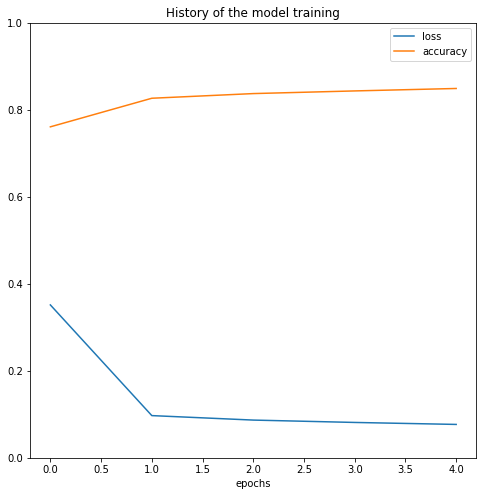

In [115]:
pd.DataFrame(history.history).plot(figsize=(8,8))
plt.xlabel('epochs')
plt.title('History of the model training')
plt.ylim([0,1])
plt.show()

### Scale the data

In [116]:
X_train = X_train/255.

In [117]:
X_test = X_test/255

## Train a new tuned model

In [130]:
# 1. Build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(28,28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

# 2. Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [131]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [132]:
lr_scheduler = LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

In [133]:
# 3. Fit the model
history = model.fit(X_train,y_train,epochs=50,callbacks=[lr_scheduler],validation_split=0.1)

Epoch 1/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5049 - accuracy: 0.8194 - val_loss: 0.4076 - val_accuracy: 0.8523
Epoch 2/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3817 - accuracy: 0.8621 - val_loss: 0.3633 - val_accuracy: 0.8708
Epoch 3/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3479 - accuracy: 0.8733 - val_loss: 0.3765 - val_accuracy: 0.8647
Epoch 4/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3280 - accuracy: 0.8801 - val_loss: 0.3903 - val_accuracy: 0.8592
Epoch 5/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3155 - accuracy: 0.8841 - val_loss: 0.3373 - val_accuracy: 0.8750
Epoch 6/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3063 - accuracy: 0.8860 - val_loss: 0.3411 - val_accuracy: 0.8772
Epoch 7/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2991 - accuracy: 0.8894 - val_loss: 0.3478 - val_accuracy:

In [129]:
# 4. Evaluate the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3580 - accuracy: 0.8711


[0.35799089074134827, 0.8711000084877014]

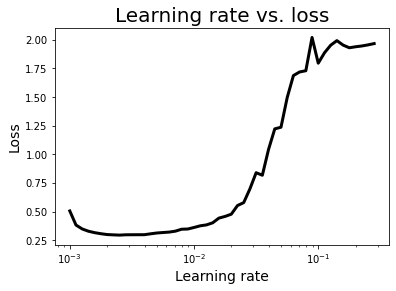

In [134]:
lr = lambda epoch: 1e-3 * 10**(epoch/20)
learning_rates = lr(np.arange(50))
plt.semilogx(
    learning_rates, 
    history.history['loss'], 
    lw=3, color='#000'
)
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14);

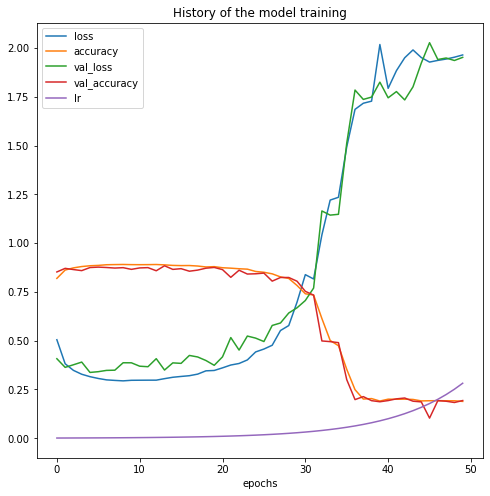

In [135]:
pd.DataFrame(history.history).plot(figsize=(8,8))
plt.xlabel('epochs')
plt.title('History of the model training')
plt.show()

In [136]:
y_pred = model.predict(X_test)

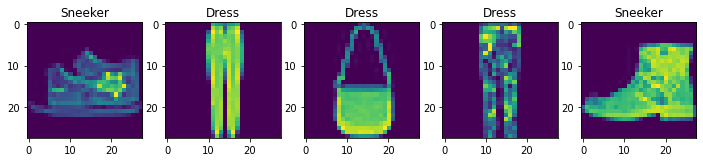

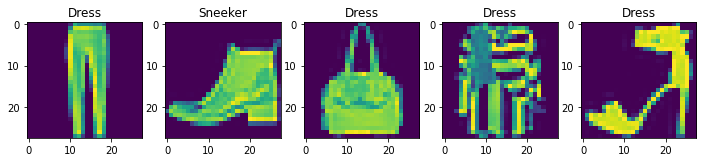

<Figure size 864x864 with 0 Axes>

In [137]:
plot_images(X_test,np.argmax(y_pred,axis=1),-10)

In [138]:
false_labels = np.argmax(y_pred[np.argmax(y_pred,axis=1) - np.argmax(y_test,axis=1) > 0],axis=1)

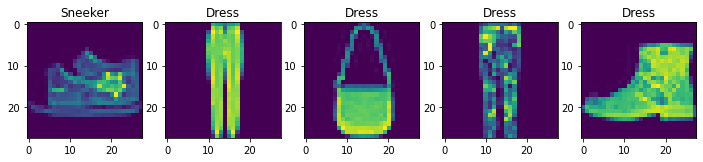

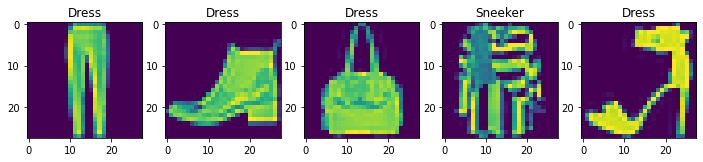

<Figure size 864x864 with 0 Axes>

In [139]:
plot_images(X_test,false_labels,-10)

## Training the final model

In [153]:
# 1. Build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(28,28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(10))

# 2. Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [154]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

In [155]:
# 3. Fit the model
model.fit(X_train,y_train, epochs=50,callbacks=[early_stopping],validation_split=0.1)

Epoch 1/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5161 - accuracy: 0.8164 - val_loss: 0.4205 - val_accuracy: 0.8472
Epoch 2/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3808 - accuracy: 0.8623 - val_loss: 0.3798 - val_accuracy: 0.8608
Epoch 3/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3397 - accuracy: 0.8767 - val_loss: 0.3834 - val_accuracy: 0.8605
Epoch 4/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3161 - accuracy: 0.8848 - val_loss: 0.3432 - val_accuracy: 0.8718
Epoch 5/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2976 - accuracy: 0.8907 - val_loss: 0.3275 - val_accuracy: 0.8818
Epoch 6/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.8946 - val_loss: 0.3672 - val_accuracy: 0.8660
Epoch 7/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2725 - accuracy: 0.8997 - val_loss: 0.3407 - val_accuracy:

In [157]:
# 4. Evaluate the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3585 - accuracy: 0.8876


[0.35846495628356934, 0.8876000046730042]

In [160]:
y_pred = model.predict(X_test)

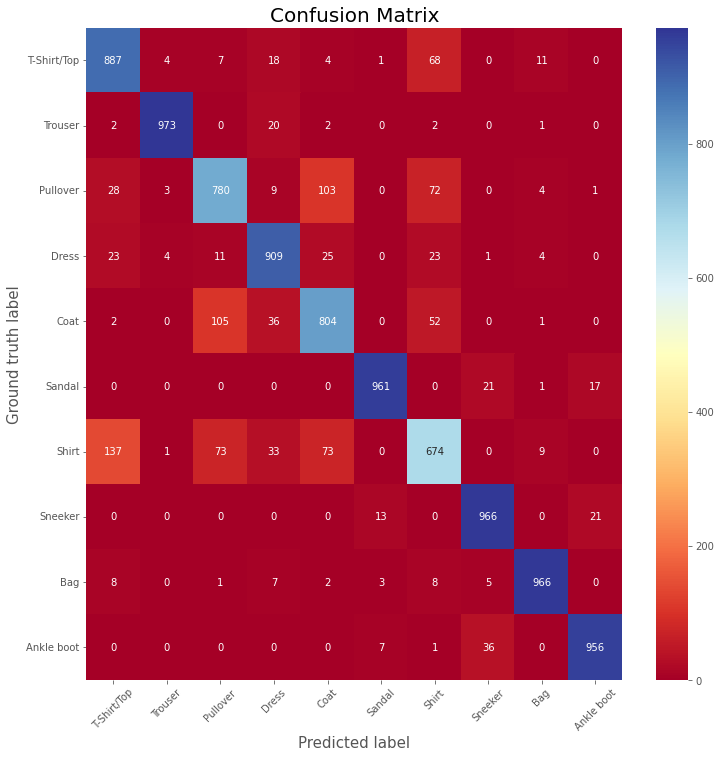

In [182]:
plt.style.use('ggplot')
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(tf.argmax(y_test,axis=1),tf.argmax(y_pred,axis=1)),annot=True,cbar=True,cmap=plt.cm.RdYlBu,fmt='g')
plt.title('Confusion Matrix',fontsize=20)
plt.xlabel('Predicted label',fontsize=15)
plt.ylabel('Ground truth label',fontsize=15)
plt.xticks([i+0.5 for i in range(10)],[dict_labels[i] for i in range(10)],rotation=45)
plt.yticks([i+0.5 for i in range(10)],[dict_labels[i] for i in range(10)],rotation=0)
plt.show()

## What patterns is our model learning?

In [188]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_70 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_71 (Dense)             (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


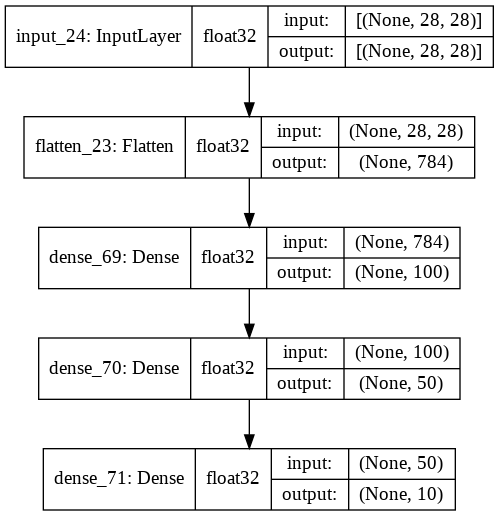

In [198]:
tf.keras.utils.plot_model(model,show_layer_names=True,show_dtype=True,show_shapes=True)

In [187]:
weights, biases = model.layers[1].get_weights()

In [189]:
# weights and shape
weights, weights.shape

(array([[-0.19745491, -0.16227704,  0.04997355, ...,  0.05828939,
          0.03365854, -0.19416103],
        [-0.18060254,  0.187698  ,  0.27826807, ..., -0.08188108,
         -0.16408655, -0.33497494],
        [-0.2839557 ,  0.18706983,  0.03534166, ...,  0.04028822,
         -0.06097829, -0.5149472 ],
        ...,
        [-0.39745548,  0.3191581 ,  0.37750936, ..., -0.00356075,
          0.18077235, -0.3692661 ],
        [ 0.2203896 , -0.2632659 ,  0.13206476, ...,  0.00461186,
          0.3001871 , -0.2345847 ],
        [-0.18440305,  0.02587142, -0.00755292, ...,  0.01784661,
         -0.32236394, -0.18112001]], dtype=float32), (784, 100))

In [190]:
# bias and shape
biases, biases.shape

(array([ 0.19933943, -0.10369005,  0.31248677,  0.39688283, -0.22461164,
         0.9754235 ,  0.2181082 ,  0.18701673,  0.13770418, -0.19770026,
         0.00187407,  0.02835011,  0.2567733 ,  0.522794  ,  0.05762483,
         0.28190172, -0.02828986,  0.6425706 ,  0.12839533,  0.6892671 ,
         0.30910406,  0.14975044, -0.01056928, -0.00630789,  0.7897649 ,
         0.03488795,  0.48933285,  0.3195228 ,  0.31333205, -0.01224392,
         0.33190122,  0.15643078, -0.07953528,  0.3706288 ,  0.21951859,
        -0.31960037,  0.80807585, -0.29125527,  0.6075818 ,  0.20088588,
        -0.63381034,  0.4684434 , -0.6463767 , -0.36342782,  0.05780313,
         0.00534105, -0.2424358 ,  0.40577915,  0.15580216, -0.13427462,
        -0.08944871, -0.14216375,  0.7715462 ,  0.14189754,  0.15297905,
         0.49663344, -0.01046507, -0.01738484, -0.6880713 ,  0.13149385,
         0.07548065,  0.3169646 ,  0.30116174,  0.66675174,  0.19610104,
         0.03540488,  0.59701085,  0.24484108,  0.3

### Implement the softmax myself

In [206]:
softmax = lambda x: [tf.math.exp(x[i]) / np.sum(tf.math.exp(x)) for i in range(len(x))]

In [207]:
softmax([-1., 0., 1.])

[<tf.Tensor: shape=(), dtype=float32, numpy=0.09003058>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.24472848>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.66524094>]